In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
pd.set_option('display.max_columns', None)

In [18]:
sample_sub_data = pd.read_csv("sample_submission.csv")
sample_sub_data

PassengerId  Transported
0        0013_01        False
1        0018_01        False
2        0019_01        False
3        0021_01        False
4        0023_01        False
...          ...          ...
4272     9266_02        False
4273     9269_01        False
4274     9271_01        False
4275     9273_01        False
4276     9277_01        False

[4277 rows x 2 columns]

In [2]:
test_data = pd.read_csv("test.csv")
test_data

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth      True     G/3/S    TRAPPIST-1e  27.0  False   
1        0018_01      Earth     False     F/4/S    TRAPPIST-1e  19.0  False   
2        0019_01     Europa      True     C/0/S    55 Cancri e  31.0  False   
3        0021_01     Europa     False     C/1/S    TRAPPIST-1e  38.0  False   
4        0023_01      Earth     False     F/5/S    TRAPPIST-1e  20.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0             0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1             0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2             0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3             0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4            10.0        0.0         635.0     0.0     0.0   Brence Harperez  
...           ...        ...           ...     ...     ...               ...  
4272          0.0        0.0           0.0     0.0     0.0       Jeron Peter  
4273          0.0      847.0          17.0    10.0   144.0     Matty Scheron  
4274          0.0        0.0           0.0     0.0     0.0       Jayrin Pore  
4275          0.0     2680.0           0.0     0.0   523.0    Kitakan Conale  
4276          0.0        0.0           0.0     0.0     0.0  Lilace Leonzaley  

[4277 rows x 13 columns]

In [3]:
train_data = pd.read_csv("train.csv")
train_data

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
0           False  
1            True  
2           False  
3           False  
4            True  
...           ...  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True  

[8693 rows x 14 columns]

In [5]:
cat_data = train_data.select_dtypes("object")
cat_data[["Deck", "Num", "Side"]] = cat_data["Cabin"].str.split("/", expand=True)
cat_data

PassengerId HomePlanet CryoSleep     Cabin    Destination    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  False   
...          ...        ...       ...       ...            ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  False   

                   Name Deck   Num Side  
0       Maham Ofracculy    B     0    P  
1          Juanna Vines    F     0    S  
2         Altark Susent    A     0    S  
3          Solam Susent    A     0    S  
4     Willy Santantines    F     1    S  
...                 ...  ...   ...  ...  
8688  Gravior Noxnuther    A    98    P  
8689    Kurta Mondalley    G  1499    S  
8690       Fayey Connon    G  1500    S  
8691   Celeon Hontichre    E   608    S  
8692   Propsh Hontichre    E   608    S  

[8693 rows x 10 columns]

In [4]:
num_data = train_data.select_dtypes("float")
num_data

Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0     39.0          0.0        0.0           0.0     0.0     0.0
1     24.0        109.0        9.0          25.0   549.0    44.0
2     58.0         43.0     3576.0           0.0  6715.0    49.0
3     33.0          0.0     1283.0         371.0  3329.0   193.0
4     16.0        303.0       70.0         151.0   565.0     2.0
...    ...          ...        ...           ...     ...     ...
8688  41.0          0.0     6819.0           0.0  1643.0    74.0
8689  18.0          0.0        0.0           0.0     0.0     0.0
8690  26.0          0.0        0.0        1872.0     1.0     0.0
8691  32.0          0.0     1049.0           0.0   353.0  3235.0
8692  44.0        126.0     4688.0           0.0     0.0    12.0

[8693 rows x 6 columns]

## Data exploration

### `General Information`

(0.0, 6000.0)

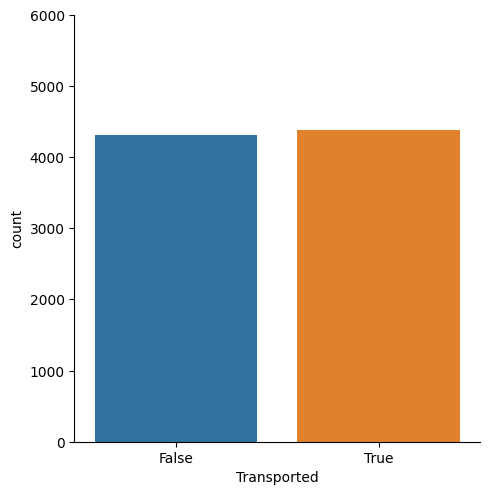

In [7]:
sns.catplot(x = "Transported", kind="count", data=train_data)
plt.ylim(0, 6000)

We have about the same amount of people who got transported and not. So, the data is indeed balanced and accuracy is a good metric to choose while we build the models.

#### General Numerical Data Exploration

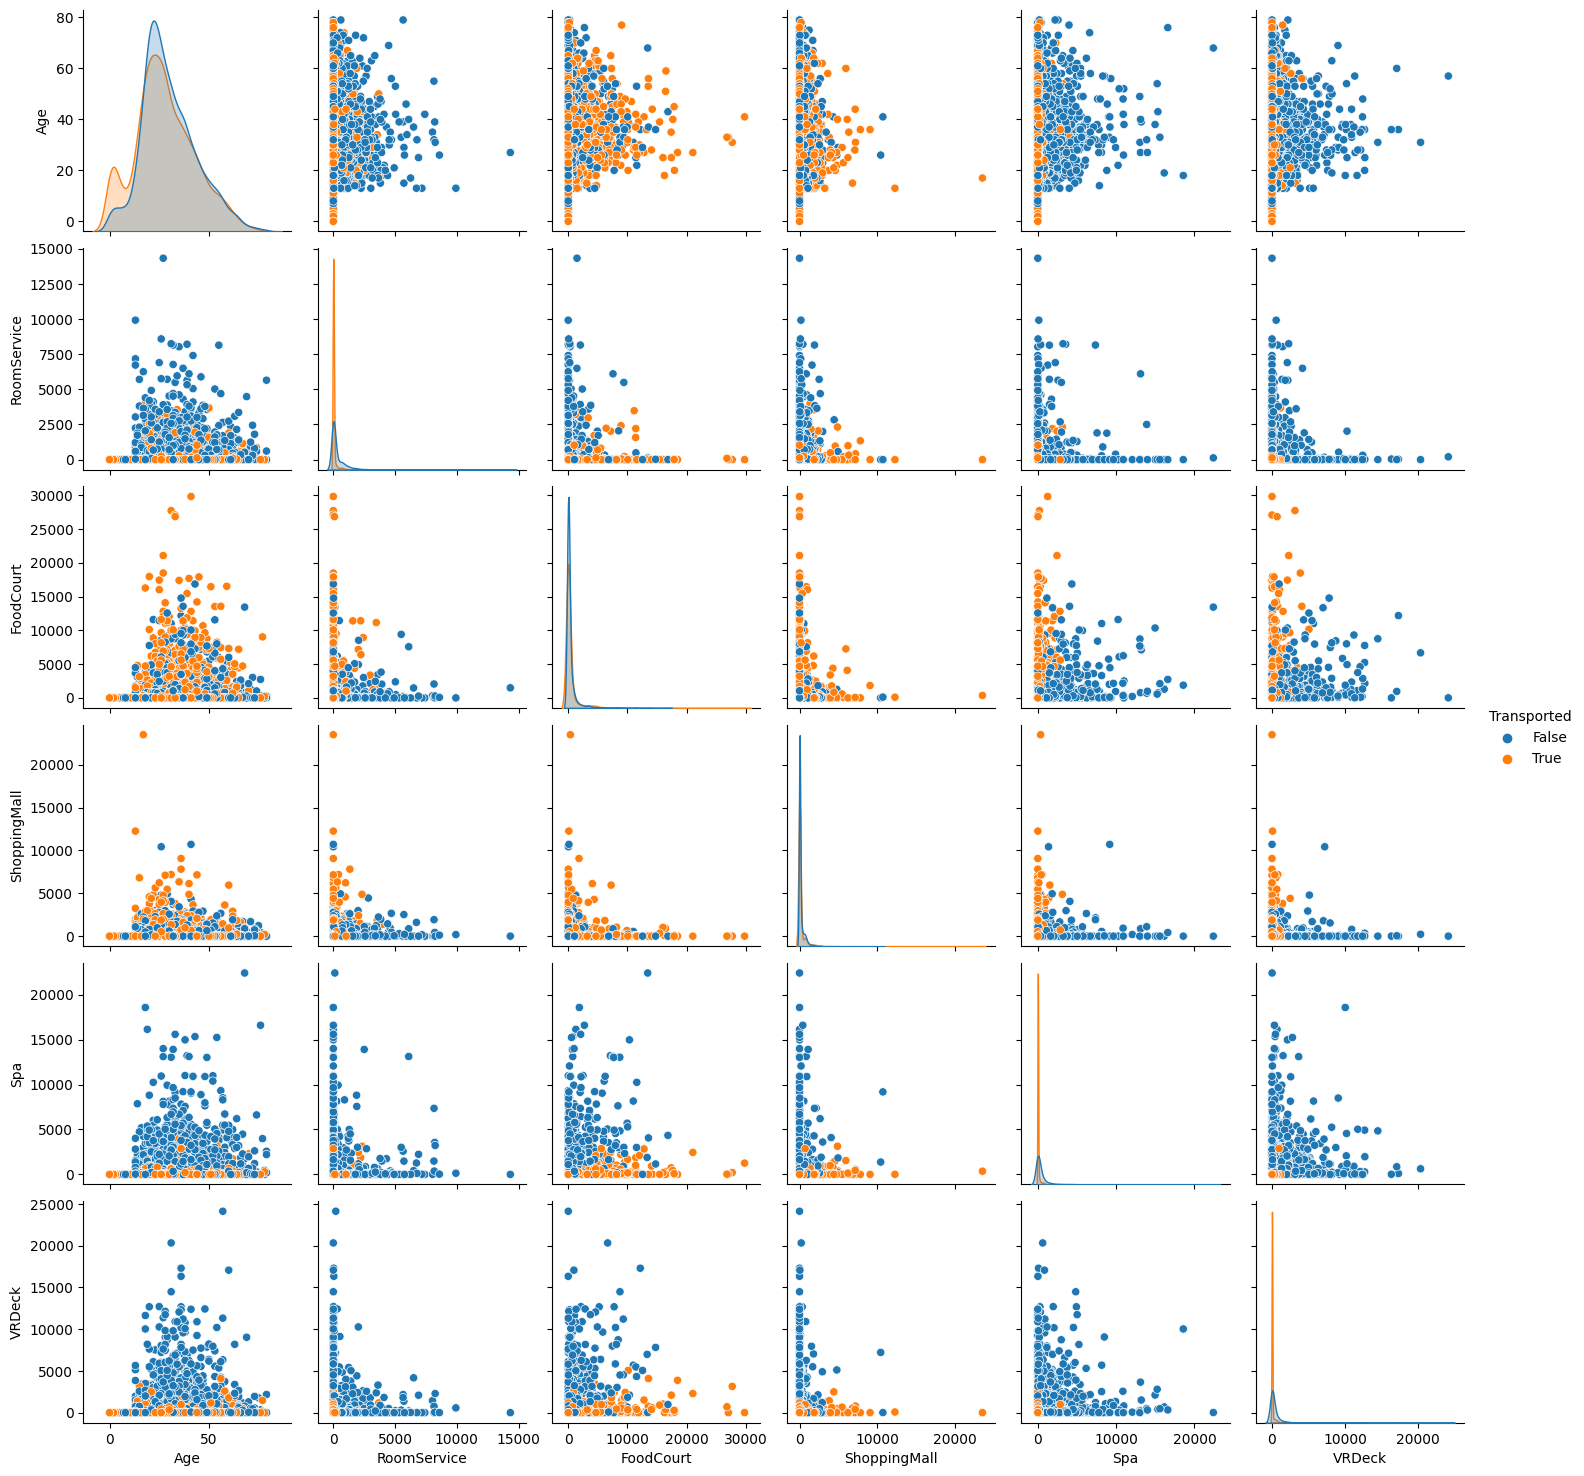

In [8]:
t = num_data
t["Transported"] = train_data["Transported"]
sns.pairplot(data=t, hue="Transported")

We can see from the plots, that's more people was **transported**, who less paid for **VRDeck**, **Spa** and **RoomService**.

#### General Categorical Data Exploration

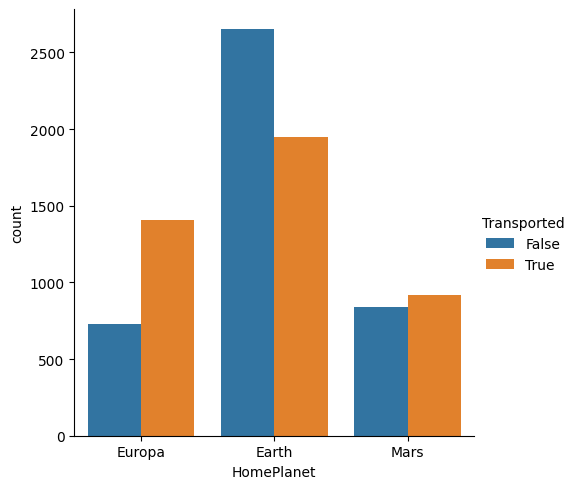

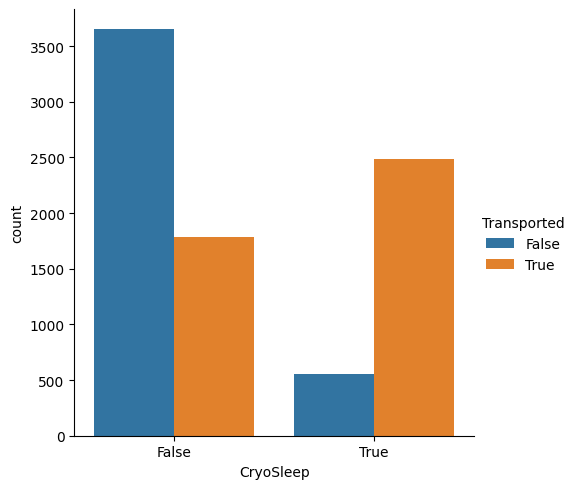

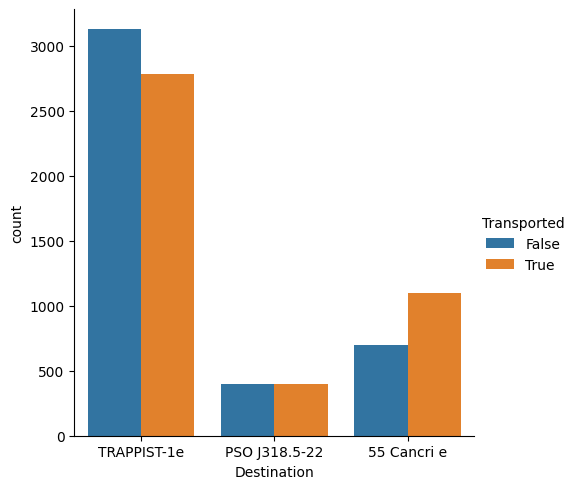

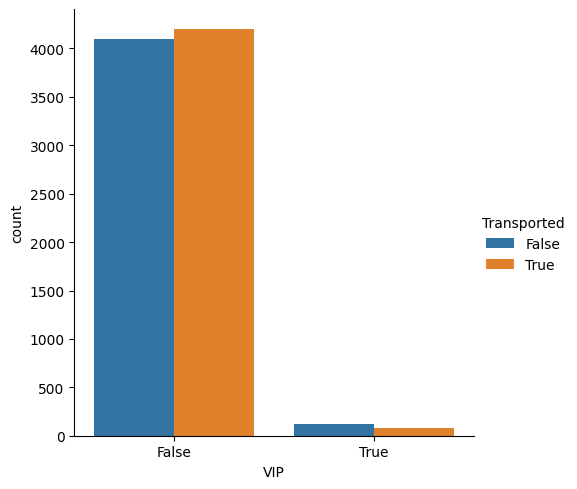

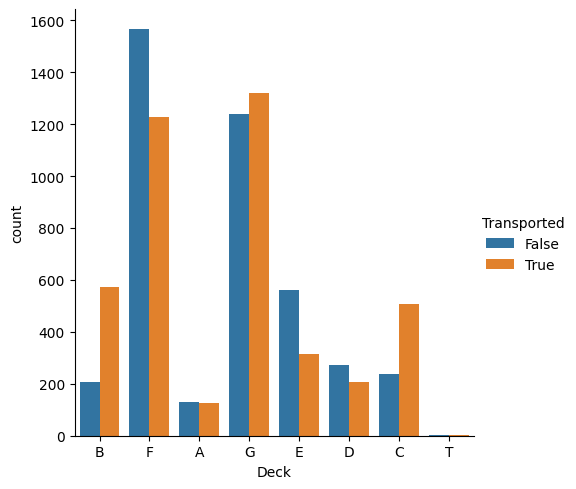

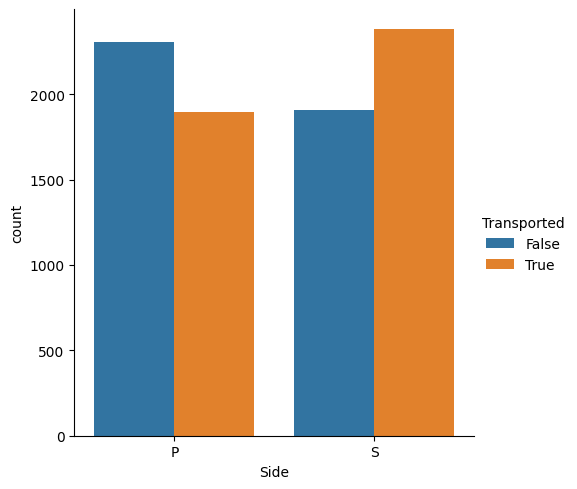

In [9]:
t = cat_data
t["Transported"] = train_data["Transported"]
t = t.drop(["PassengerId", "Name", "Num", "Cabin"], axis=1)
s = t
for i in range(0, len(t.columns)-1):
    sns.catplot(data=t, x=t.columns[i], kind="count", hue="Transported")

In [23]:
t = num_data
t["GCosts"] = t["RoomService"] + t["Spa"] + t["VRDeck"]
t["BCosts"] = t["FoodCourt"] + t["ShoppingMall"]
t = t.drop(["RoomService", "Spa", "VRDeck", "FoodCourt", "ShoppingMall"], axis=1)
t

Age  Transported  GCosts  BCosts
0     39.0        False     0.0     0.0
1     24.0         True   702.0    34.0
2     58.0        False  6807.0  3576.0
3     33.0        False  3522.0  1654.0
4     16.0         True   870.0   221.0
...    ...          ...     ...     ...
8688  41.0        False  1717.0  6819.0
8689  18.0        False     0.0     0.0
8690  26.0         True     1.0  1872.0
8691  32.0        False  3588.0  1049.0
8692  44.0         True   138.0  4688.0

[8693 rows x 4 columns]

In [22]:
print(cat_data.columns, num_data.columns, s.columns, t.columns)
s = s.drop("Transported", axis=1)
g = s
for i in t.columns:
    g[i] = t[i]
g

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name', 'Deck', 'Num', 'Side', 'Transported'],
      dtype='object') Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'GCosts', 'BCosts'],
      dtype='object') Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side', 'Age',
       'Transported', 'GCosts', 'BCosts'],
      dtype='object') Index(['Age', 'Transported', 'GCosts', 'BCosts'], dtype='object')


HomePlanet CryoSleep    Destination    VIP Deck Side   Age  GCosts  \
0        Europa     False    TRAPPIST-1e  False    B    P  39.0     0.0   
1         Earth     False    TRAPPIST-1e  False    F    S  24.0   702.0   
2        Europa     False    TRAPPIST-1e   True    A    S  58.0  6807.0   
3        Europa     False    TRAPPIST-1e  False    A    S  33.0  3522.0   
4         Earth     False    TRAPPIST-1e  False    F    S  16.0   870.0   
...         ...       ...            ...    ...  ...  ...   ...     ...   
8688     Europa     False    55 Cancri e   True    A    P  41.0  1717.0   
8689      Earth      True  PSO J318.5-22  False    G    S  18.0     0.0   
8690      Earth     False    TRAPPIST-1e  False    G    S  26.0     1.0   
8691     Europa     False    55 Cancri e  False    E    S  32.0  3588.0   
8692     Europa     False    TRAPPIST-1e  False    E    S  44.0   138.0   

      BCosts  Transported  
0        0.0        False  
1       34.0         True  
2     3576.0        False  
3     1654.0        False  
4      221.0         True  
...      ...          ...  
8688  6819.0        False  
8689     0.0        False  
8690  1872.0         True  
8691  1049.0        False  
8692  4688.0         True  

[8693 rows x 10 columns]

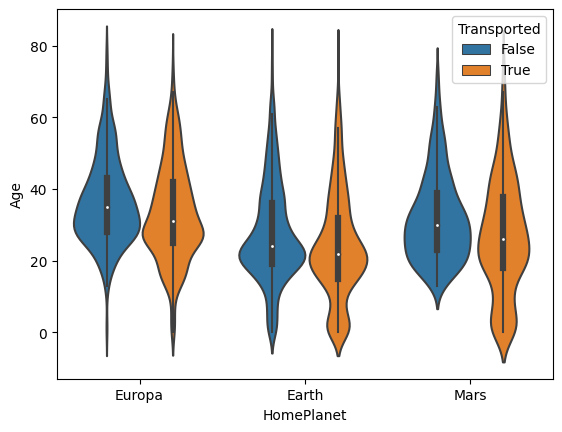

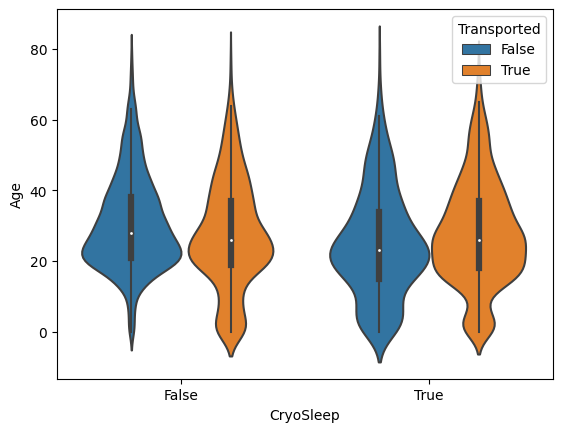

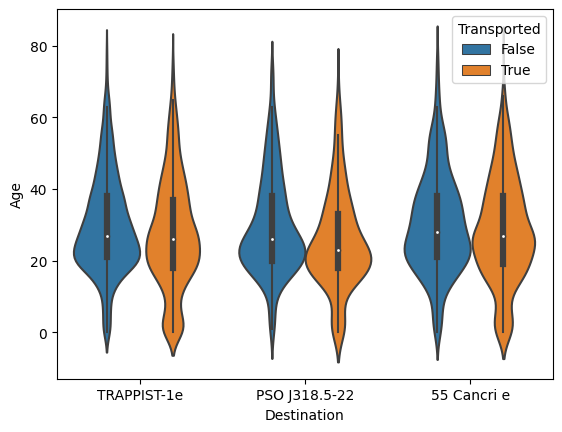

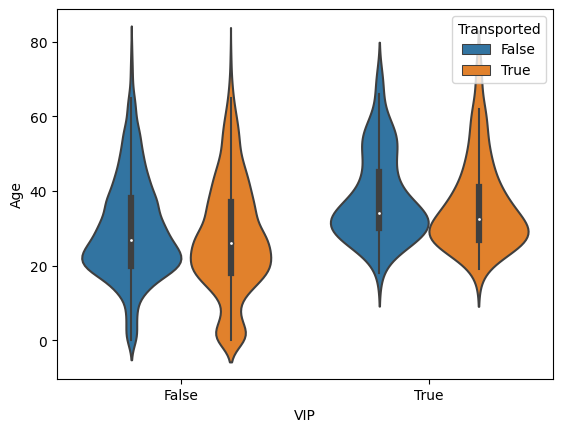

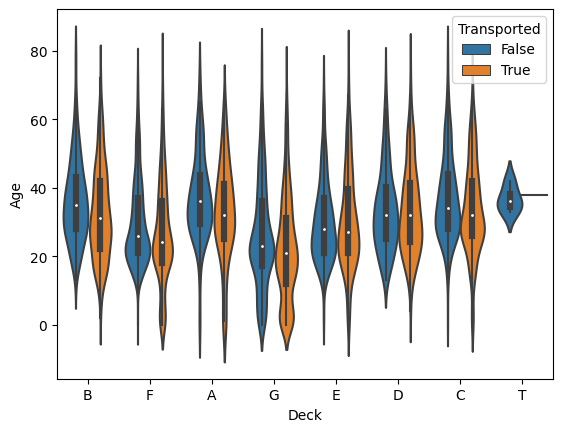

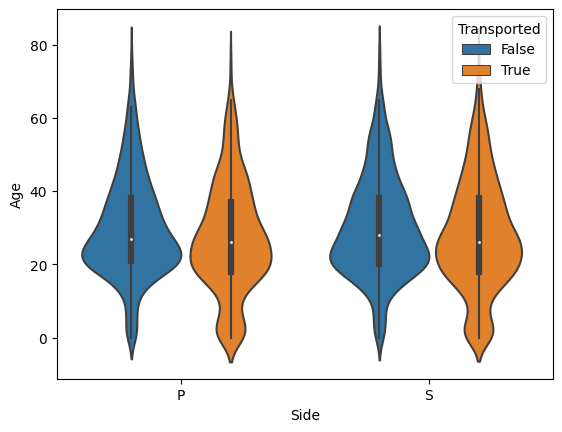

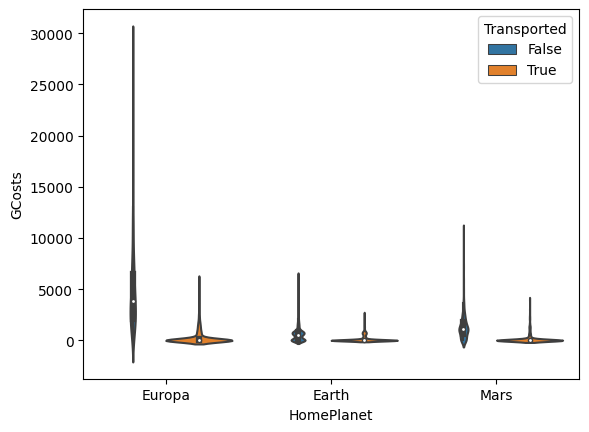

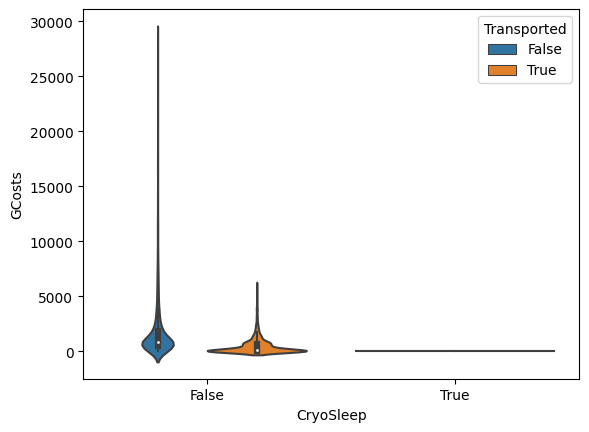

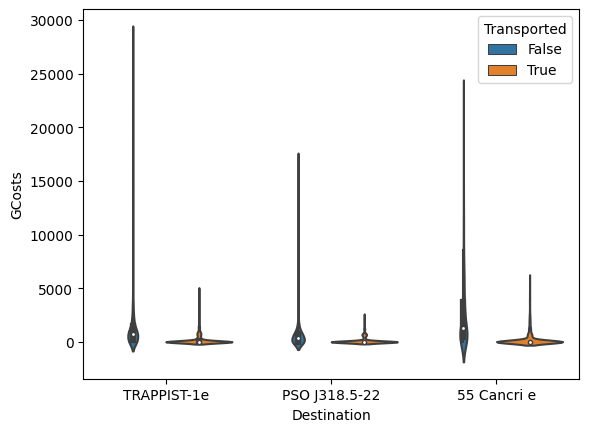

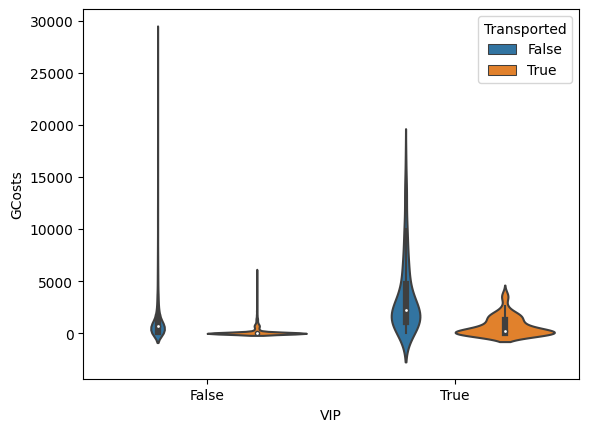

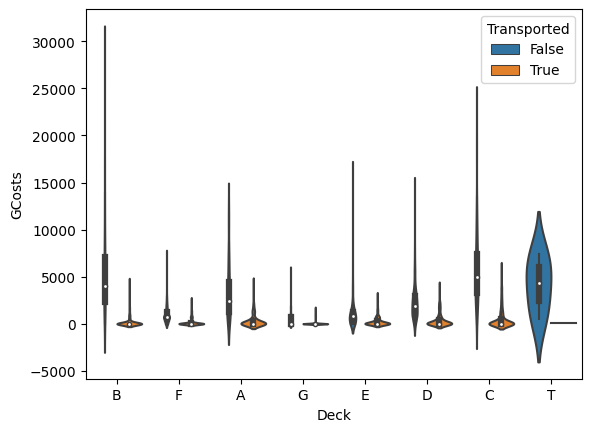

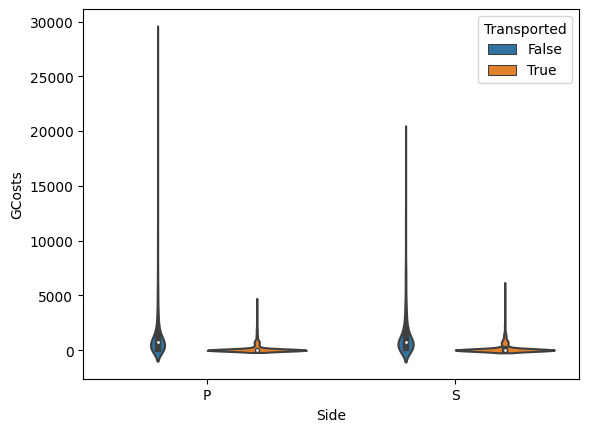

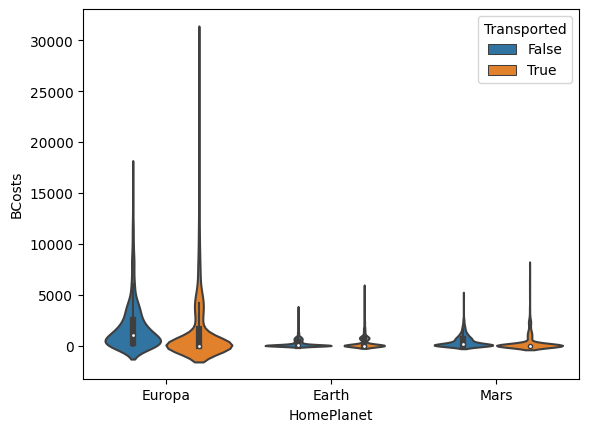

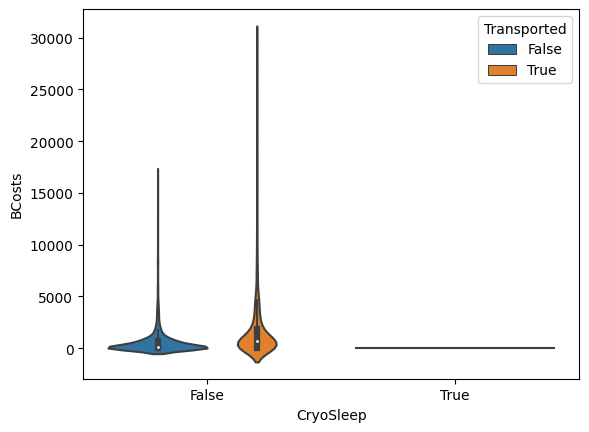

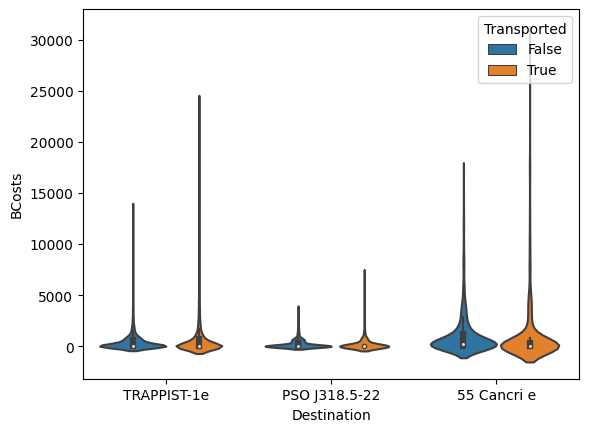

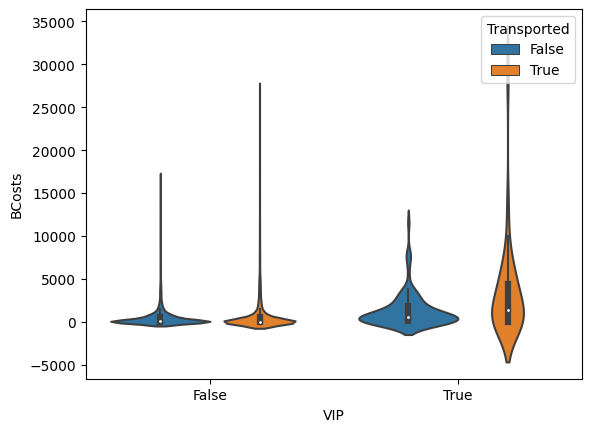

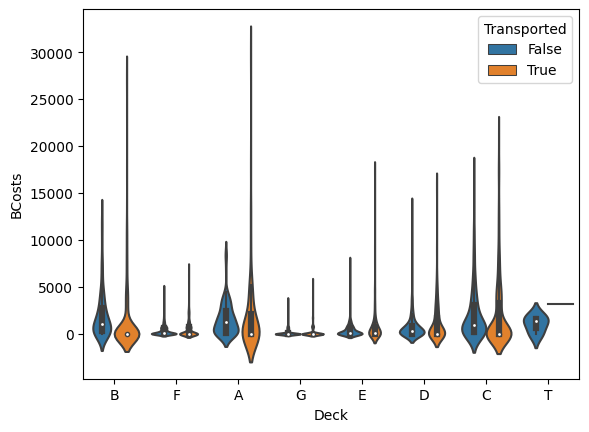

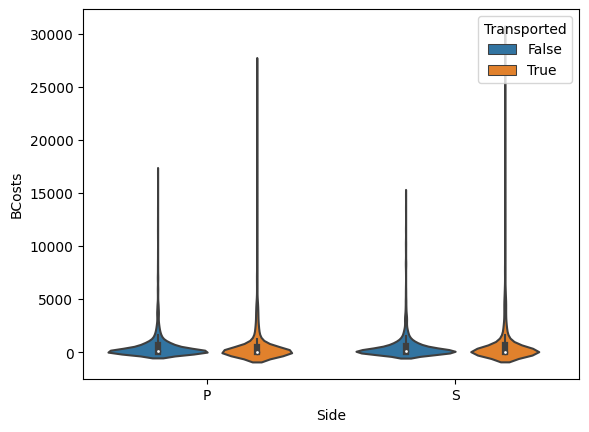

In [30]:
for i in t.drop("Transported", axis=1).columns:
    for j in cat_data.drop(["Transported", "Name", "Cabin", "PassengerId", "Num"], axis=1).columns:
        sns.violinplot(hue=g["Transported"], y=g[i], x=g[j])
        plt.show()

### `PassengerId` and `Name`

**PassengerId** and **Name** columns consist of data that are almost unique for each object. All information that we can get from this, is that people with an equal surname and passengers from one group are usually located in one place (not always). It's more relevant to drop these columns.

## Data preprocessing

In [156]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [38]:
train_data.head()

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported  Deck Side  
0           0.0     0.0     0.0        False   2.0    P  
1          25.0   549.0    44.0         True   6.0    S  
2           0.0  6715.0    49.0        False   1.0    S  
3         371.0  3329.0   193.0        False   1.0    S  
4         151.0   565.0     2.0         True   6.0    S

In [157]:
train_data[["Deck", "Num", "Side"]] = train_data["Cabin"].str.split("/", expand=True)
train_data["HomePlanet"] = train_data["HomePlanet"].fillna("Earth")
train_data["Destination"] = train_data["Destination"].fillna("TRAPPIST-1e")
train_data["VIP"] = train_data["VIP"].fillna("False")
train_data = train_data.drop(["PassengerId", "Name", "Cabin", "Num"], axis=1)
train_data.head()

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported Deck Side  
0           0.0     0.0     0.0        False    B    P  
1          25.0   549.0    44.0         True    F    S  
2           0.0  6715.0    49.0        False    A    S  
3         371.0  3329.0   193.0        False    A    S  
4         151.0   565.0     2.0         True    F    S

In [158]:
test_data[["Deck", "Num", "Side"]] = test_data["Cabin"].str.split("/", expand=True)
test_data["HomePlanet"] = test_data["HomePlanet"].fillna("Earth")
test_data["Destination"] = test_data["Destination"].fillna("TRAPPIST-1e")
test_data["VIP"] = test_data["VIP"].fillna("False")
test_data = test_data.drop(["PassengerId", "Name", "Cabin", "Num"], axis=1)
test_data.head()


HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0      Earth      True  TRAPPIST-1e  27.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  19.0  False          0.0        9.0   
2     Europa      True  55 Cancri e  31.0  False          0.0        0.0   
3     Europa     False  TRAPPIST-1e  38.0  False          0.0     6652.0   
4      Earth     False  TRAPPIST-1e  20.0  False         10.0        0.0   

   ShoppingMall     Spa  VRDeck Deck Side  
0           0.0     0.0     0.0    G    S  
1           0.0  2823.0     0.0    F    S  
2           0.0     0.0     0.0    C    S  
3           0.0   181.0   585.0    C    S  
4         635.0     0.0     0.0    F    S

In [159]:
encoder = ce.OrdinalEncoder(cols=['Deck', 'Side'], mapping=[
    {
        'col':'Deck',
        'mapping':{
            'A':1,
            'B':2,
            'C':3,
            'D':4,
            'E':5,
            'F':6,
            'G':7,
            'T':8,
            }},
    {
        "col":'Side',
        "mapping":{
            "S":1,
            "P":2
        }
    }
    ])
x = train_data["Transported"];
train_data = encoder.fit_transform(train_data.drop(["Transported"], axis=1))
train_data["Transported"] = x
test_data = encoder.transform(test_data)

In [89]:
train_data.head()

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Deck  Side  Transported  
0           0.0     0.0     0.0   2.0   2.0        False  
1          25.0   549.0    44.0   6.0   1.0         True  
2           0.0  6715.0    49.0   1.0   1.0        False  
3         371.0  3329.0   193.0   1.0   1.0        False  
4         151.0   565.0     2.0   6.0   1.0         True

In [160]:
from sklearn.impute import KNNImputer
imputer1 = KNNImputer(n_neighbors=3)
imputer2 = KNNImputer(missing_values=-1, n_neighbors=3)
t = pd.DataFrame([])
s = pd.DataFrame([])
t[["HomePlanet", "CryoSleep", "Destination", "VIP", "Transported"]] = train_data[["HomePlanet", "CryoSleep", "Destination", "VIP", "Transported"]]
s[["Deck", "Side"]] = train_data[["Deck", "Side"]]
train_data = imputer1.fit_transform(train_data.drop(["HomePlanet", "CryoSleep", "Destination", "VIP", "Transported", "Deck", "Side"], axis=1))
train_data = pd.DataFrame(train_data)
train_data[["Deck", "Side"]] = s[["Deck", "Side"]]
train_data = imputer2.fit_transform(train_data)
train_data = pd.DataFrame(train_data)
train_data[["HomePlanet", "CryoSleep", "Destination", "VIP", "Transported"]] = t[["HomePlanet", "CryoSleep", "Destination", "VIP", "Transported"]]

t[["HomePlanet", "CryoSleep", "Destination", "VIP"]] = test_data[["HomePlanet", "CryoSleep", "Destination", "VIP"]]
s[["Deck", "Side"]] = test_data[["Deck", "Side"]]
test_data = imputer1.transform(test_data.drop(["HomePlanet", "CryoSleep", "Destination", "VIP", "Deck", "Side"], axis=1))
test_data = pd.DataFrame(test_data)
test_data[["Deck", "Side"]] = s[["Deck", "Side"]]
test_data = imputer2.transform(test_data)

/home/perfomo/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/perfomo/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/perfomo/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [162]:
train_data.head()

0      1       2      3       4      5    6    7 HomePlanet CryoSleep  \
0  39.0    0.0     0.0    0.0     0.0    0.0  2.0  2.0     Europa     False   
1  24.0  109.0     9.0   25.0   549.0   44.0  6.0  1.0      Earth     False   
2  58.0   43.0  3576.0    0.0  6715.0   49.0  1.0  1.0     Europa     False   
3  33.0    0.0  1283.0  371.0  3329.0  193.0  1.0  1.0     Europa     False   
4  16.0  303.0    70.0  151.0   565.0    2.0  6.0  1.0      Earth     False   

   Destination    VIP  Transported  
0  TRAPPIST-1e  False        False  
1  TRAPPIST-1e  False         True  
2  TRAPPIST-1e   True        False  
3  TRAPPIST-1e  False        False  
4  TRAPPIST-1e  False         True

In [17]:
train_data["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [11]:
all_data = pd.concat([test_data, train_data])
all_data.shape

(12970, 14)

In [12]:
# Here i drop some not interesting for me columns.
# data = all_data.drop(["Name", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", ], axis=1)
data = all_data.drop(["Name", "PassengerId"], axis=1)
# data
# data = all_data

In [18]:
test_data.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [33]:
CryoSleep = data["CryoSleep"].fillna(0.5)
CryoSleep = CryoSleep.replace([True, False], [1.0, 0.0])
Cabin = data["Cabin"].fillna("N")
Cabin_1 = []
Cabin_2 = []
for i in Cabin:
    Cabin_1.append(i[0])
    Cabin_2.append(i[-1])
data["CryoSleep"] = CryoSleep
data = data.drop("Cabin", axis=1)
data["Cabin_1"] = Cabin_1
data["Cabin_2"] = Cabin_2
data["Age"] = data["Age"].fillna(data["Age"].mean())
data.HomePlanet = data.HomePlanet.fillna("Earth")
data.Destination = data.Destination.fillna("TRAPPIST-1e")
vip = data["VIP"].fillna(0.5)
vip = vip.replace([True, False], [1.0, 0.0])
data["VIP"] = vip
data

C:\Users\Perfomo\AppData\Roaming\Python\Python311\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\Users\Perfomo\AppData\Roaming\Python\Python311\site-packages\IPython\core\formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


PassengerId HomePlanet  CryoSleep    Destination   Age  VIP Transported  \
0           0013      Earth        1.0    TRAPPIST-1e  27.0  0.0         NaN   
1           0018      Earth        0.0    TRAPPIST-1e  19.0  0.0         NaN   
2           0019     Europa        1.0    55 Cancri e  31.0  0.0         NaN   
3           0021     Europa        0.0    TRAPPIST-1e  38.0  0.0         NaN   
4           0023      Earth        0.0    TRAPPIST-1e  20.0  0.0         NaN   
...          ...        ...        ...            ...   ...  ...         ...   
8688        9276     Europa        0.0    55 Cancri e  41.0  1.0       False   
8689        9278      Earth        1.0  PSO J318.5-22  18.0  0.0       False   
8690        9279      Earth        0.0    TRAPPIST-1e  26.0  0.0        True   
8691        9280     Europa        0.0    55 Cancri e  32.0  0.0       False   
8692        9280     Europa        0.0    TRAPPIST-1e  44.0  0.0        True   

     Cabin_1 Cabin_2  
0          G       S  
1          F       S  
2          C       S  
3          C       S  
4          F       S  
...      ...     ...  
8688       A       P  
8689       G       S  
8690       G       S  
8691       E       S  
8692       E       S  

[12970 rows x 9 columns]

In [9]:
data.Destination.value_counts()

TRAPPIST-1e      9145
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

In [34]:
s = data.copy()
s

PassengerId HomePlanet  CryoSleep    Destination   Age  VIP Transported  \
0           0013      Earth        1.0    TRAPPIST-1e  27.0  0.0         NaN   
1           0018      Earth        0.0    TRAPPIST-1e  19.0  0.0         NaN   
2           0019     Europa        1.0    55 Cancri e  31.0  0.0         NaN   
3           0021     Europa        0.0    TRAPPIST-1e  38.0  0.0         NaN   
4           0023      Earth        0.0    TRAPPIST-1e  20.0  0.0         NaN   
...          ...        ...        ...            ...   ...  ...         ...   
8688        9276     Europa        0.0    55 Cancri e  41.0  1.0       False   
8689        9278      Earth        1.0  PSO J318.5-22  18.0  0.0       False   
8690        9279      Earth        0.0    TRAPPIST-1e  26.0  0.0        True   
8691        9280     Europa        0.0    55 Cancri e  32.0  0.0       False   
8692        9280     Europa        0.0    TRAPPIST-1e  44.0  0.0        True   

     Cabin_1 Cabin_2  
0          G       S  
1          F       S  
2          C       S  
3          C       S  
4          F       S  
...      ...     ...  
8688       A       P  
8689       G       S  
8690       G       S  
8691       E       S  
8692       E       S  

[12970 rows x 9 columns]

In [35]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
s["PassengerId"] = encoder.fit_transform(s)
s

PassengerId HomePlanet  CryoSleep    Destination   Age  VIP Transported  \
0            12.0      Earth        1.0    TRAPPIST-1e  27.0  0.0         NaN   
1            17.0      Earth        0.0    TRAPPIST-1e  19.0  0.0         NaN   
2            18.0     Europa        1.0    55 Cancri e  31.0  0.0         NaN   
3            20.0     Europa        0.0    TRAPPIST-1e  38.0  0.0         NaN   
4            22.0      Earth        0.0    TRAPPIST-1e  20.0  0.0         NaN   
...           ...        ...        ...            ...   ...  ...         ...   
8688       9275.0     Europa        0.0    55 Cancri e  41.0  1.0       False   
8689       9277.0      Earth        1.0  PSO J318.5-22  18.0  0.0       False   
8690       9278.0      Earth        0.0    TRAPPIST-1e  26.0  0.0        True   
8691       9279.0     Europa        0.0    55 Cancri e  32.0  0.0       False   
8692       9279.0     Europa        0.0    TRAPPIST-1e  44.0  0.0        True   

     Cabin_1 Cabin_2  
0          G       S  
1          F       S  
2          C       S  
3          C       S  
4          F       S  
...      ...     ...  
8688       A       P  
8689       G       S  
8690       G       S  
8691       E       S  
8692       E       S  

[12970 rows x 9 columns]

In [36]:
data["PassengerId"] = s["PassengerId"]
data

C:\Users\Perfomo\AppData\Roaming\Python\Python311\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\Users\Perfomo\AppData\Roaming\Python\Python311\site-packages\IPython\core\formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


PassengerId HomePlanet  CryoSleep    Destination   Age  VIP Transported  \
0            12.0      Earth        1.0    TRAPPIST-1e  27.0  0.0         NaN   
1            17.0      Earth        0.0    TRAPPIST-1e  19.0  0.0         NaN   
2            18.0     Europa        1.0    55 Cancri e  31.0  0.0         NaN   
3            20.0     Europa        0.0    TRAPPIST-1e  38.0  0.0         NaN   
4            22.0      Earth        0.0    TRAPPIST-1e  20.0  0.0         NaN   
...           ...        ...        ...            ...   ...  ...         ...   
8688       9275.0     Europa        0.0    55 Cancri e  41.0  1.0       False   
8689       9277.0      Earth        1.0  PSO J318.5-22  18.0  0.0       False   
8690       9278.0      Earth        0.0    TRAPPIST-1e  26.0  0.0        True   
8691       9279.0     Europa        0.0    55 Cancri e  32.0  0.0       False   
8692       9279.0     Europa        0.0    TRAPPIST-1e  44.0  0.0        True   

     Cabin_1 Cabin_2  
0          G       S  
1          F       S  
2          C       S  
3          C       S  
4          F       S  
...      ...     ...  
8688       A       P  
8689       G       S  
8690       G       S  
8691       E       S  
8692       E       S  

[12970 rows x 9 columns]

In [41]:
data_dum = data.drop("Transported", axis=1)
data_dum = pd.get_dummies(data_dum)
data_dum["Transported"] = data["Transported"]
data_dum

C:\Users\Perfomo\AppData\Roaming\Python\Python311\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\Users\Perfomo\AppData\Roaming\Python\Python311\site-packages\IPython\core\formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


PassengerId  CryoSleep   Age  VIP  HomePlanet_Earth  HomePlanet_Europa  \
0            12.0        1.0  27.0  0.0                 1                  0   
1            17.0        0.0  19.0  0.0                 1                  0   
2            18.0        1.0  31.0  0.0                 0                  1   
3            20.0        0.0  38.0  0.0                 0                  1   
4            22.0        0.0  20.0  0.0                 1                  0   
...           ...        ...   ...  ...               ...                ...   
8688       9275.0        0.0  41.0  1.0                 0                  1   
8689       9277.0        1.0  18.0  0.0                 1                  0   
8690       9278.0        0.0  26.0  0.0                 1                  0   
8691       9279.0        0.0  32.0  0.0                 0                  1   
8692       9279.0        0.0  44.0  0.0                 0                  1   

      HomePlanet_Mars  Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                   0                        0                          0   
1                   0                        0                          0   
2                   0                        1                          0   
3                   0                        0                          0   
4                   0                        0                          0   
...               ...                      ...                        ...   
8688                0                        1                          0   
8689                0                        0                          1   
8690                0                        0                          0   
8691                0                        1                          0   
8692                0                        0                          0   

      Destination_TRAPPIST-1e  Cabin_1_A  Cabin_1_B  Cabin_1_C  Cabin_1_D  \
0                           1          0          0          0          0   
1                           1          0          0          0          0   
2                           0          0          0          1          0   
3                           1          0          0          1          0   
4                           1          0          0          0          0   
...                       ...        ...        ...        ...        ...   
8688                        0          1          0          0          0   
8689                        0          0          0          0          0   
8690                        1          0          0          0          0   
8691                        0          0          0          0          0   
8692                        1          0          0          0          0   

      Cabin_1_E  Cabin_1_F  Cabin_1_G  Cabin_1_N  Cabin_1_T  Cabin_2_N  \
0             0          0          1          0          0          0   
1             0          1          0          0          0          0   
2             0          0          0          0          0          0   
3             0          0          0          0          0          0   
4             0          1          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
8688          0          0          0          0          0          0   
8689          0          0          1          0          0          0   
8690          0          0          1          0          0          0   
8691          1          0          0          0          0          0   
8692          1          0          0          0          0          0   

      Cabin_2_P  Cabin_2_S Transported  
0             0          1         NaN  
1             0          1         NaN  
2             0          1         NaN  
3             0          1         NaN  
4             0          1         NaN  
...         ...        ...         ...  
8688          1    

In [42]:
data_dum["PassengerId"] = [ ((i - data_dum["PassengerId"].mean()) / data_dum["PassengerId"].std()).round(3) for i in data_dum["PassengerId"]]

In [43]:
data_dum

C:\Users\Perfomo\AppData\Roaming\Python\Python311\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\Users\Perfomo\AppData\Roaming\Python\Python311\site-packages\IPython\core\formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


PassengerId  CryoSleep   Age  VIP  HomePlanet_Earth  HomePlanet_Europa  \
0          -1.721        1.0  27.0  0.0                 1                  0   
1          -1.719        0.0  19.0  0.0                 1                  0   
2          -1.719        1.0  31.0  0.0                 0                  1   
3          -1.718        0.0  38.0  0.0                 0                  1   
4          -1.717        0.0  20.0  0.0                 1                  0   
...           ...        ...   ...  ...               ...                ...   
8688        1.728        0.0  41.0  1.0                 0                  1   
8689        1.729        1.0  18.0  0.0                 1                  0   
8690        1.729        0.0  26.0  0.0                 1                  0   
8691        1.729        0.0  32.0  0.0                 0                  1   
8692        1.729        0.0  44.0  0.0                 0                  1   

      HomePlanet_Mars  Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                   0                        0                          0   
1                   0                        0                          0   
2                   0                        1                          0   
3                   0                        0                          0   
4                   0                        0                          0   
...               ...                      ...                        ...   
8688                0                        1                          0   
8689                0                        0                          1   
8690                0                        0                          0   
8691                0                        1                          0   
8692                0                        0                          0   

      Destination_TRAPPIST-1e  Cabin_1_A  Cabin_1_B  Cabin_1_C  Cabin_1_D  \
0                           1          0          0          0          0   
1                           1          0          0          0          0   
2                           0          0          0          1          0   
3                           1          0          0          1          0   
4                           1          0          0          0          0   
...                       ...        ...        ...        ...        ...   
8688                        0          1          0          0          0   
8689                        0          0          0          0          0   
8690                        1          0          0          0          0   
8691                        0          0          0          0          0   
8692                        1          0          0          0          0   

      Cabin_1_E  Cabin_1_F  Cabin_1_G  Cabin_1_N  Cabin_1_T  Cabin_2_N  \
0             0          0          1          0          0          0   
1             0          1          0          0          0          0   
2             0          0          0          0          0          0   
3             0          0          0          0          0          0   
4             0          1          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
8688          0          0          0          0          0          0   
8689          0          0          1          0          0          0   
8690          0          0          1          0          0          0   
8691          1          0          0          0          0          0   
8692          1          0          0          0          0          0   

      Cabin_2_P  Cabin_2_S Transported  
0             0          1         NaN  
1             0          1         NaN  
2             0          1         NaN  
3             0          1         NaN  
4             0          1         NaN  
...         ...        ...         ...  
8688          1    

In [44]:
x = data_dum[4277:]
y = x["Transported"]
x = x.drop("Transported", axis=1)
x

PassengerId  CryoSleep   Age  VIP  HomePlanet_Earth  HomePlanet_Europa  \
0          -1.725        0.0  39.0  0.0                 0                  1   
1          -1.725        0.0  24.0  0.0                 1                  0   
2          -1.725        0.0  58.0  1.0                 0                  1   
3          -1.725        0.0  33.0  0.0                 0                  1   
4          -1.724        0.0  16.0  0.0                 1                  0   
...           ...        ...   ...  ...               ...                ...   
8688        1.728        0.0  41.0  1.0                 0                  1   
8689        1.729        1.0  18.0  0.0                 1                  0   
8690        1.729        0.0  26.0  0.0                 1                  0   
8691        1.729        0.0  32.0  0.0                 0                  1   
8692        1.729        0.0  44.0  0.0                 0                  1   

      HomePlanet_Mars  Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                   0                        0                          0   
1                   0                        0                          0   
2                   0                        0                          0   
3                   0                        0                          0   
4                   0                        0                          0   
...               ...                      ...                        ...   
8688                0                        1                          0   
8689                0                        0                          1   
8690                0                        0                          0   
8691                0                        1                          0   
8692                0                        0                          0   

      Destination_TRAPPIST-1e  Cabin_1_A  Cabin_1_B  Cabin_1_C  Cabin_1_D  \
0                           1          0          1          0          0   
1                           1          0          0          0          0   
2                           1          1          0          0          0   
3                           1          1          0          0          0   
4                           1          0          0          0          0   
...                       ...        ...        ...        ...        ...   
8688                        0          1          0          0          0   
8689                        0          0          0          0          0   
8690                        1          0          0          0          0   
8691                        0          0          0          0          0   
8692                        1          0          0          0          0   

      Cabin_1_E  Cabin_1_F  Cabin_1_G  Cabin_1_N  Cabin_1_T  Cabin_2_N  \
0             0          0          0          0          0          0   
1             0          1          0          0          0          0   
2             0          0          0          0          0          0   
3             0          0          0          0          0          0   
4             0          1          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
8688          0          0          0          0          0          0   
8689          0          0          1          0          0          0   
8690          0          0          1          0          0          0   
8691          1          0          0          0          0          0   
8692          1          0          0          0          0          0   

      Cabin_2_P  Cabin_2_S  
0             1          0  
1             0          1  
2             0          1  
3             0          1  
4             0          1  
...         ...        ...  
8688          1          0  
8689          0          1  
8690          0          1  
8691          0 

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [193]:
def results(y_test, y_pred):
    print(pd.DataFrame(y_test == y_pred).value_counts())


In [48]:
x

PassengerId  CryoSleep   Age  VIP  HomePlanet_Earth  HomePlanet_Europa  \
0          -1.725        0.0  39.0  0.0                 0                  1   
1          -1.725        0.0  24.0  0.0                 1                  0   
2          -1.725        0.0  58.0  1.0                 0                  1   
3          -1.725        0.0  33.0  0.0                 0                  1   
4          -1.724        0.0  16.0  0.0                 1                  0   
...           ...        ...   ...  ...               ...                ...   
8688        1.728        0.0  41.0  1.0                 0                  1   
8689        1.729        1.0  18.0  0.0                 1                  0   
8690        1.729        0.0  26.0  0.0                 1                  0   
8691        1.729        0.0  32.0  0.0                 0                  1   
8692        1.729        0.0  44.0  0.0                 0                  1   

      HomePlanet_Mars  Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                   0                        0                          0   
1                   0                        0                          0   
2                   0                        0                          0   
3                   0                        0                          0   
4                   0                        0                          0   
...               ...                      ...                        ...   
8688                0                        1                          0   
8689                0                        0                          1   
8690                0                        0                          0   
8691                0                        1                          0   
8692                0                        0                          0   

      Destination_TRAPPIST-1e  Cabin_1_A  Cabin_1_B  Cabin_1_C  Cabin_1_D  \
0                           1          0          1          0          0   
1                           1          0          0          0          0   
2                           1          1          0          0          0   
3                           1          1          0          0          0   
4                           1          0          0          0          0   
...                       ...        ...        ...        ...        ...   
8688                        0          1          0          0          0   
8689                        0          0          0          0          0   
8690                        1          0          0          0          0   
8691                        0          0          0          0          0   
8692                        1          0          0          0          0   

      Cabin_1_E  Cabin_1_F  Cabin_1_G  Cabin_1_N  Cabin_1_T  Cabin_2_N  \
0             0          0          0          0          0          0   
1             0          1          0          0          0          0   
2             0          0          0          0          0          0   
3             0          0          0          0          0          0   
4             0          1          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
8688          0          0          0          0          0          0   
8689          0          0          1          0          0          0   
8690          0          0          1          0          0          0   
8691          1          0          0          0          0          0   
8692          1          0          0          0          0          0   

      Cabin_2_P  Cabin_2_S  
0             1          0  
1             0          1  
2             0          1  
3             0          1  
4             0          1  
...         ...        ...  
8688          1          0  
8689          0          1  
8690          0          1  
8691          0 

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=45, learning_rate=0.25, max_depth=4, random_state=0).fit(x_train, y_train.astype('int'))
gb.score(x_test, y_test.astype('int'))
# y_pred = gb.predict(x_test)
# results(y_test, y_pred)

0.743813175322412

In [49]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train.astype('int'))
y_pred = clf.predict(x_test)
y_pred = y_pred.astype('bool')
clf.score(x_test, y_test.astype('int'))


0.6737539212269084

In [117]:
pd.DataFrame(y_train).value_counts()

Transported
True           2933
False          2891
dtype: int64

In [116]:
pd.DataFrame(y_pred).value_counts()

True     1508
False    1361
dtype: int64

In [50]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train.astype('int'))
clf.score(x_test, y_test.astype('int'))

# y_pred = classifier.predict(x_test)

0.6737539212269084

In [55]:
y_pred = y_pred.astype('bool')
results(y_test, y_pred)

Transported
True           1467
False          1402
dtype: int64


In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(x_train, y_train.astype('int'))
clf.score(x_test, y_test.astype('int'))

# y_pred = model.predict(x_test)

In [53]:
y_pred = y_pred.astype('bool')
results(y_test, y_pred)

Transported
True           1809
False          1060
dtype: int64


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(x_train, y_train.astype('int'))
y_pred = regressor.predict(x_test)
y_pred = y_pred.astype('bool')
results(y_test, y_pred)

---------

In [61]:
X_test = data_dum[0:4277]
X_test = X_test.drop("Transported", axis=1)
X_test

PassengerId  CryoSleep        Age  Cabin_1_A  Cabin_1_B  Cabin_1_C  \
0            12.0        1.0  27.000000          0          0          0   
1            17.0        0.0  19.000000          0          0          0   
2            18.0        1.0  31.000000          0          0          1   
3            20.0        0.0  38.000000          0          0          1   
4            22.0        0.0  20.000000          0          0          0   
...           ...        ...        ...        ...        ...        ...   
4272       9265.0        1.0  34.000000          0          0          0   
4273       9268.0        0.0  42.000000          0          0          0   
4274       9270.0        1.0  28.771969          0          0          0   
4275       9272.0        0.0  28.771969          0          0          0   
4276       9276.0        1.0  43.000000          0          0          0   

      Cabin_1_D  Cabin_1_E  Cabin_1_F  Cabin_1_G  Cabin_1_N  Cabin_1_T  \
0             0          0          0          1          0          0   
1             0          0          1          0          0          0   
2             0          0          0          0          0          0   
3             0          0          0          0          0          0   
4             0          0          1          0          0          0   
...         ...        ...        ...        ...        ...        ...   
4272          0          0          0          1          0          0   
4273          0          0          0          0          1          0   
4274          1          0          0          0          0          0   
4275          1          0          0          0          0          0   
4276          0          0          0          1          0          0   

      Cabin_2_N  Cabin_2_P  Cabin_2_S  
0             0          0          1  
1             0          0          1  
2             0          0          1  
3             0          0          1  
4             0          0          1  
...         ...        ...        ...  
4272          0          0          1  
4273          1          0          0  
4274          0          1          0  
4275          0          1          0  
4276          0          0          1  

[4277 rows x 15 columns]

In [122]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y.astype('int'))
y_pred = clf.predict(X_test)
y_pred = y_pred.astype('bool')
y_pred

array([ True, False,  True, ...,  True,  True,  True])

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=30, learning_rate=0.5, max_depth=3, random_state=0).fit(x, y.astype('int'))
# gb.score(x_test, y_test.astype('int'))
y_pred = gb.predict(X_test)
y_pred = y_pred.astype('bool')
y_pred

array([False, False,  True, ...,  True,  True, False])

In [64]:
y_pred.shape

(4277,)

In [65]:
result = pd.DataFrame({"PassengerId":test_data["PassengerId"], "Transported": y_pred})
result

PassengerId  Transported
0        0013_01        False
1        0018_01        False
2        0019_01         True
3        0021_01        False
4        0023_01        False
...          ...          ...
4272     9266_02         True
4273     9269_01         True
4274     9271_01         True
4275     9273_01         True
4276     9277_01        False

[4277 rows x 2 columns]

In [67]:
result.to_csv('results3.csv', index=False)

In [143]:
result

PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01        False
...          ...          ...
4272     9266_02         True
4273     9269_01         True
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]

In [150]:
result = result.reset_index(drop=True)
result

PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01        False
...          ...          ...
4272     9266_02         True
4273     9269_01         True
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]

In [68]:
s = pd.read_csv("results3.csv")

In [69]:
s

PassengerId  Transported
0        0013_01        False
1        0018_01        False
2        0019_01         True
3        0021_01        False
4        0023_01        False
...          ...          ...
4272     9266_02         True
4273     9269_01         True
4274     9271_01         True
4275     9273_01         True
4276     9277_01        False

[4277 rows x 2 columns]